# ML Assignment 1
## Group 12:
#### Kuan-Yu (Leo) Liao
#### Rishikesan (Rishi) Ravichandran
#### Anurag Vedagiri

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf

In [2]:
# Reading the csv file 
data = pd.read_csv('fundamentals.csv',index_col=0)

## 1. Data Exploration and Visualization

In [3]:
data.head()

Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
0           AAL    2012-12-31      3.068000e+09         -222000000.0   
1           AAL    2013-12-31      4.975000e+09          -93000000.0   
2           AAL    2014-12-31      4.668000e+09         -160000000.0   
3           AAL    2015-12-31      5.102000e+09          352000000.0   
4           AAP    2012-12-29      2.409453e+09          -89482000.0   

   Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0               -1.961000e+09           23.0         -1.888000e+09   
1               -2.723000e+09           67.0         -3.114000e+09   
2               -1.500000e+08          143.0         -5.311000e+09   
3               -7.080000e+08          135.0         -6.151000e+09   
4                6.000000e+05           32.0         -2.711820e+08   

   Capital Surplus  Cash Ratio  Cash and Cash Equivalents  ...  \
0     4.695000e+09        53.0               1.330000e+09  ...   
1     1.059200e+10        75.0               2.175000e+09  ...   
2     1.513500e+10        60.0               1.768000e+09  ...   
3     1.159100e+10        51.0               1.085000e+09  ...   
4     5.202150e+08        23.0               5.981110e+08  ...   

   Total Current Assets  Total Current Liabilities  Total Equity  \
0          7.072000e+09               9.011000e+09 -7.987000e+09   
1          1.432300e+10               1.380600e+10 -2.731000e+09   
2          1.175000e+10               1.340400e+10  2.021000e+09   
3          9.985000e+09               1.360500e+10  5.635000e+09   
4          3.184200e+09               2.559638e+09  1.210694e+09   

   Total Liabilities  Total Liabilities & Equity  Total Revenue  \
0       2.489100e+10                1.690400e+10   2.485500e+10   
1       4.500900e+10                4.227800e+10   2.674300e+10   
2       4.120400e+10                4.322500e+10   4.265000e+10   
3       4.278000e+10                4.841500e+10   4.099000e+10   
4       3.403120e+09                4.613814e+09   6.205003e+09   

   Treasury Stock  For Year  Earnings Per Share  Estimated Shares Outstanding  
0    -367000000.0    2012.0               -5.60                  3.350000e+08  
1             0.0    2013.0              -11.25                  1.630222e+08  
2             0.0    2014.0                4.02                  7.169154e+08  
3             0.0    2015.0               11.39                  6.681299e+08  
4     -27095000.0    2012.0                5.29                  7.328355e+07  

[5 rows x 78 columns]

In [4]:
# Checking for NaNs across the dataframe
data.isnull().sum()

#Removing all the null values in the dataframe as it will affect the model fit 
data=data.dropna()

In [5]:
# Dropping the columns 'Ticker Symbol' and 'Period Ending' as they're not useful for our analysis. This is under the assumptiom
# that we're purely trying to quantify relationship between estimated outstanding shares and other financial metrics under annual SEC 10K 
# filings
data.drop(columns=['Ticker Symbol','Period Ending'],axis=1,inplace=True)

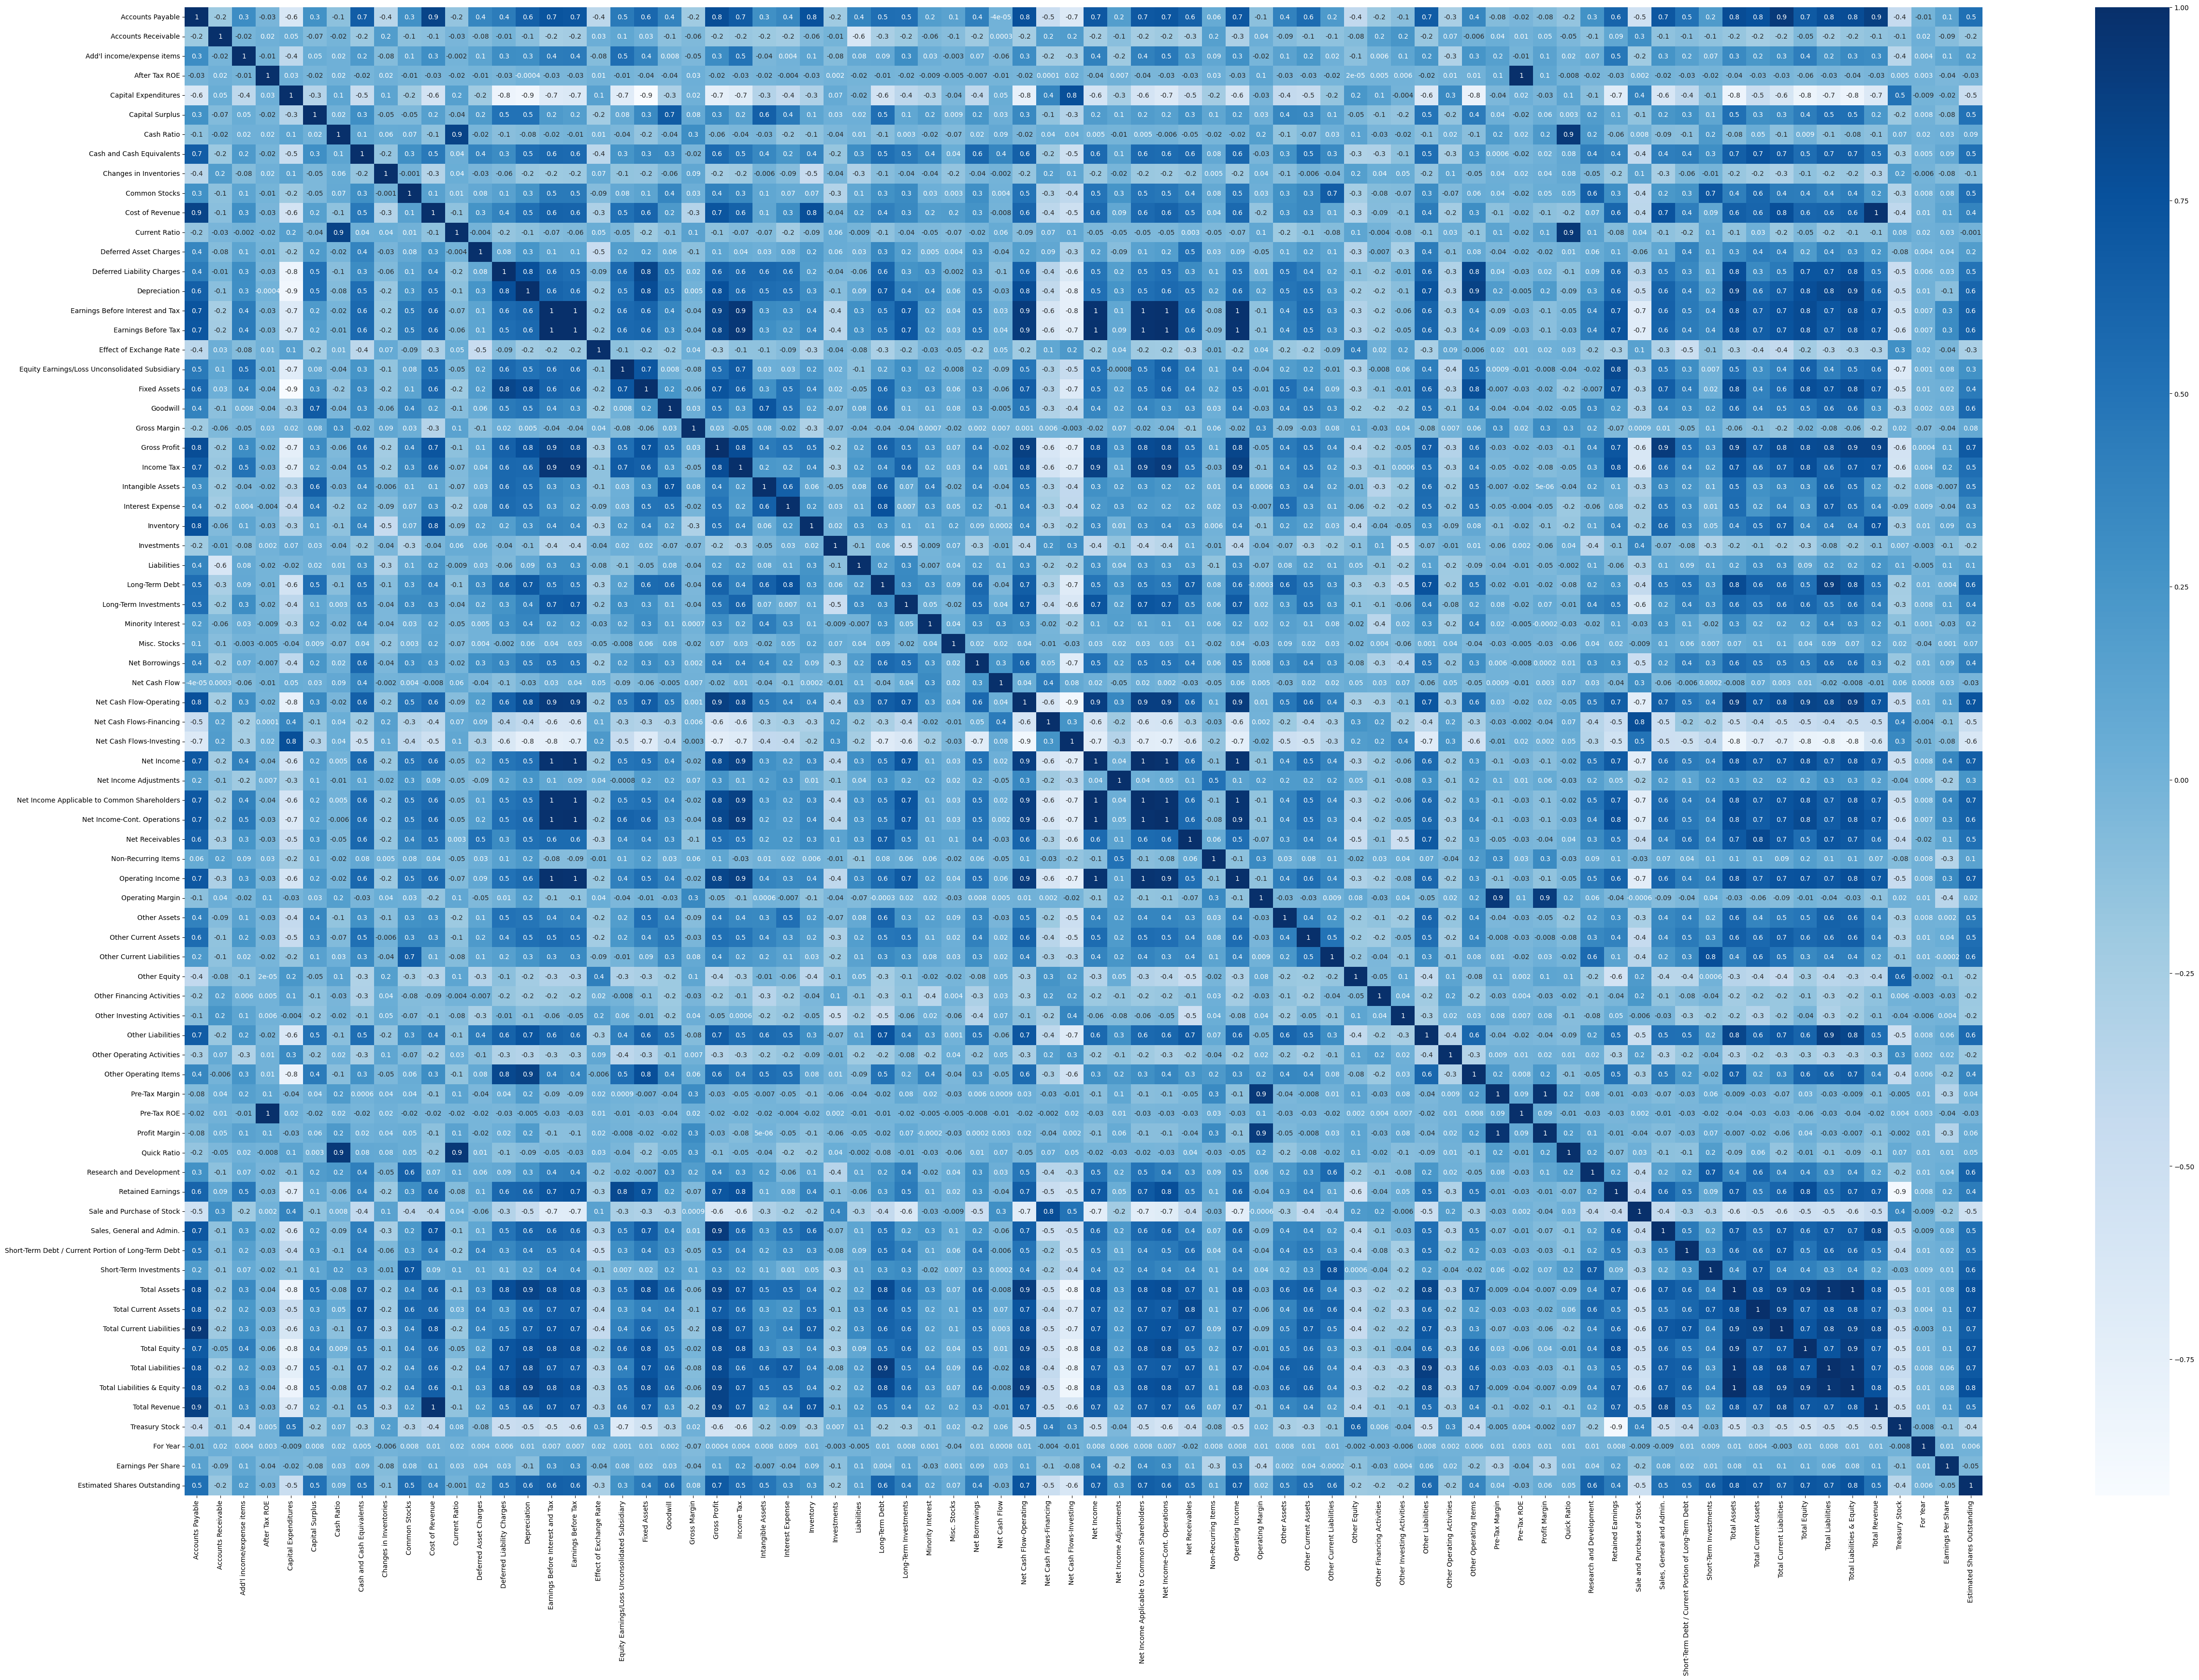

In [6]:
# Analyzing the correlation between independent variabes and dependent variables.
# This will give us some sense to look into further data exploration before the model building phase.
# Although, this exploration is just for a high level understanding, more things could come out during the model fitting part.

cor=data.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

In [7]:
# Understand the Dependent Variable 
var="Estimated Shares Outstanding"

# Storing the columns that have a correlation of 0.7 or more w.r.t to the dependent variable 'Estimated Shares Outstanding'
var_of_interest = cor[cor[var]>=0.7].index.tolist()
var_of_interest

['Net Cash Flow-Operating',
 'Total Assets',
 'Total Current Assets',
 'Total Equity',
 'Total Liabilities & Equity',
 'Estimated Shares Outstanding']

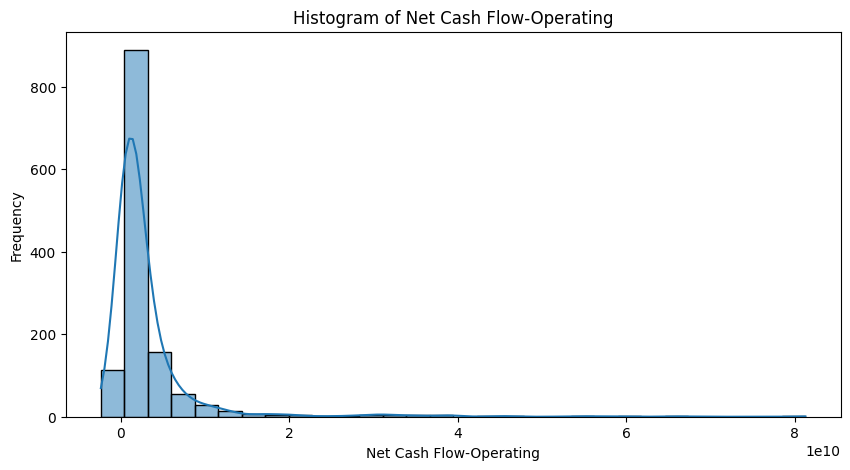

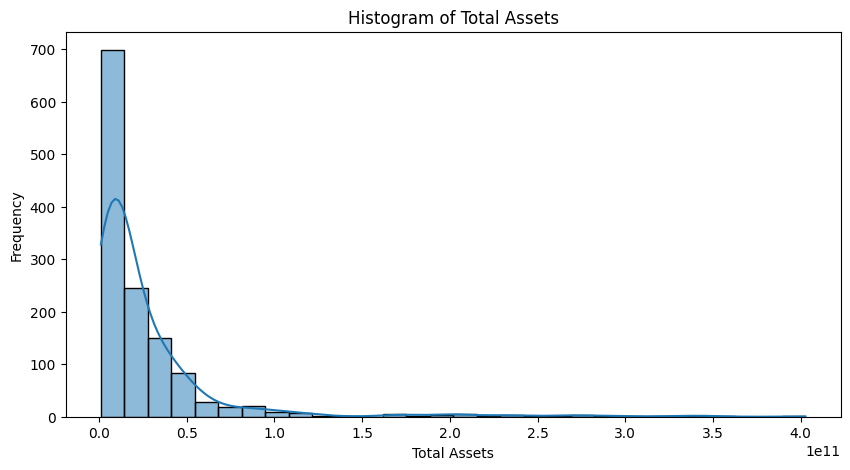

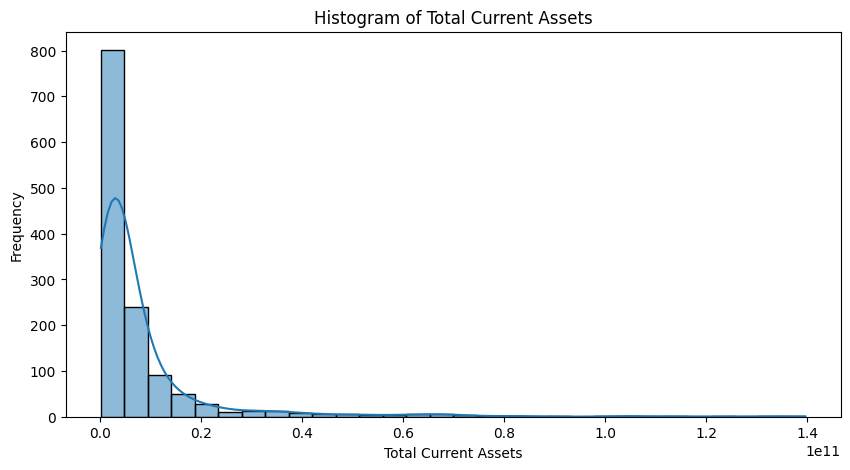

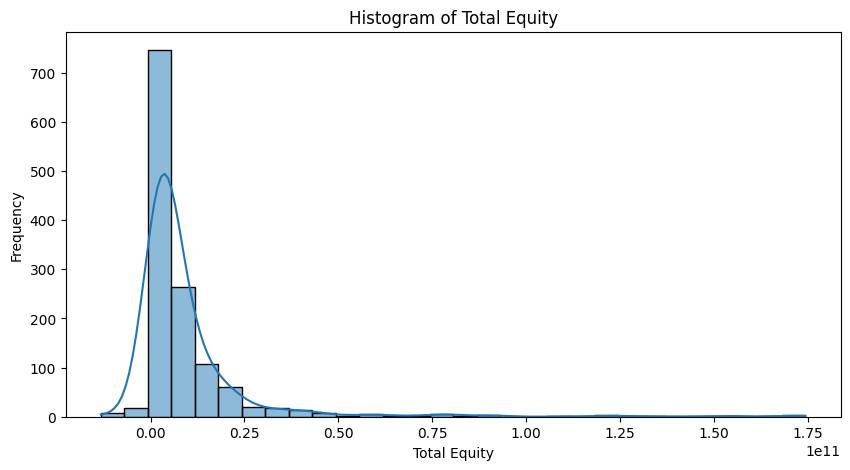

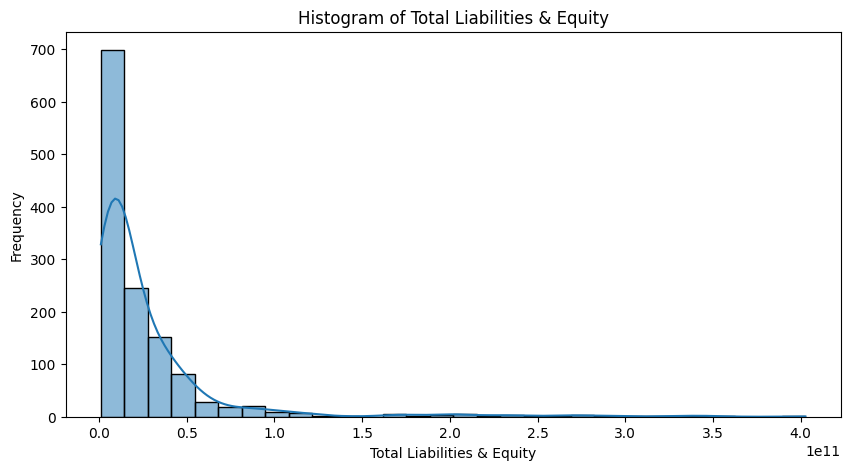

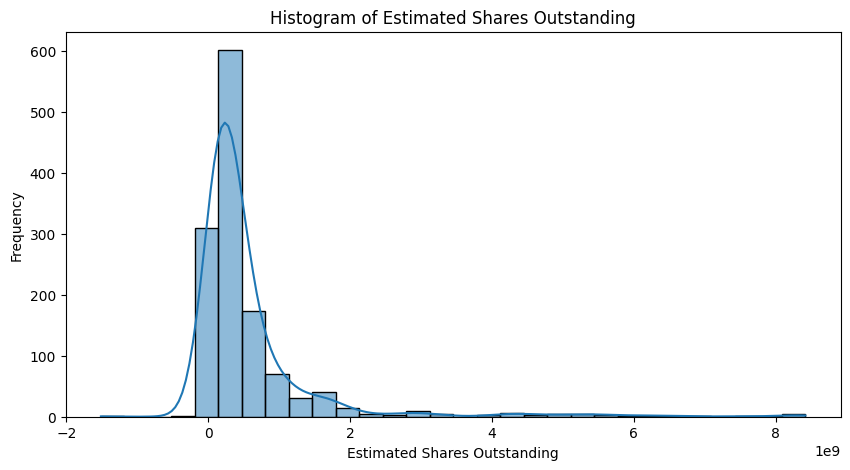

In [8]:
#Create histogram for all these columns 

for col in var_of_interest:
    # print(f"The average {var} in the dataset is {round(data[var].mean(),0)}")
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], bins=30, edgecolor='black', alpha=0.5,kde=True) # set the histrogram
    # set value, x, y labels
    plt.title(f"Histogram of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show() #print the histrogram

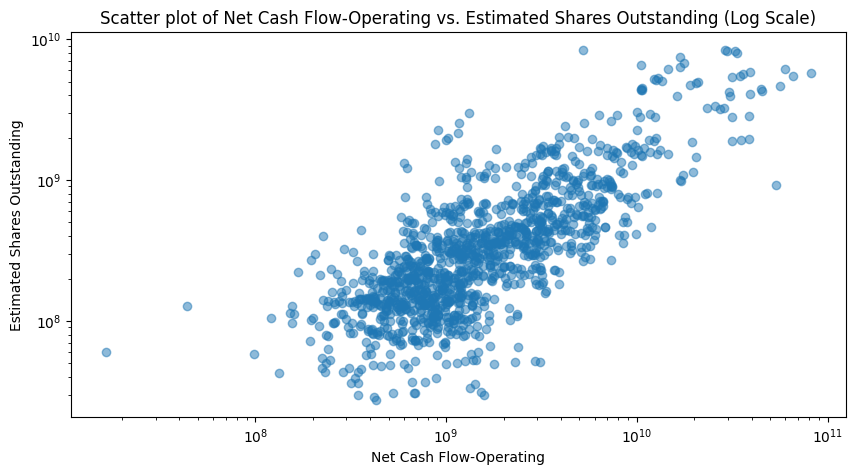

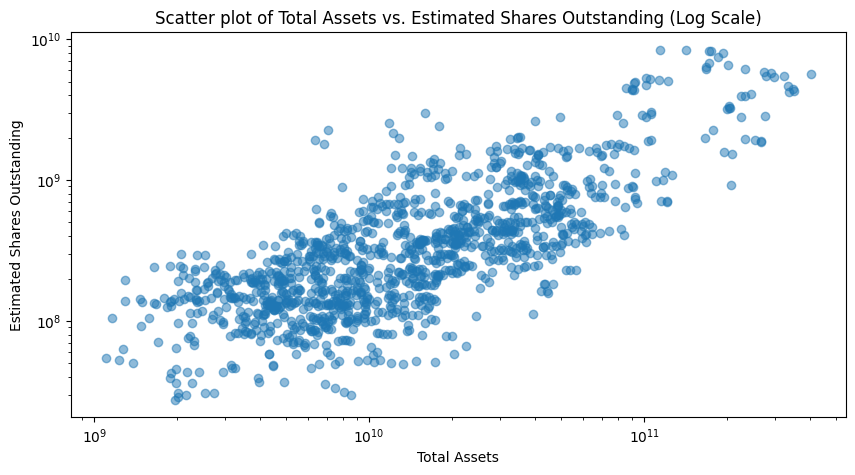

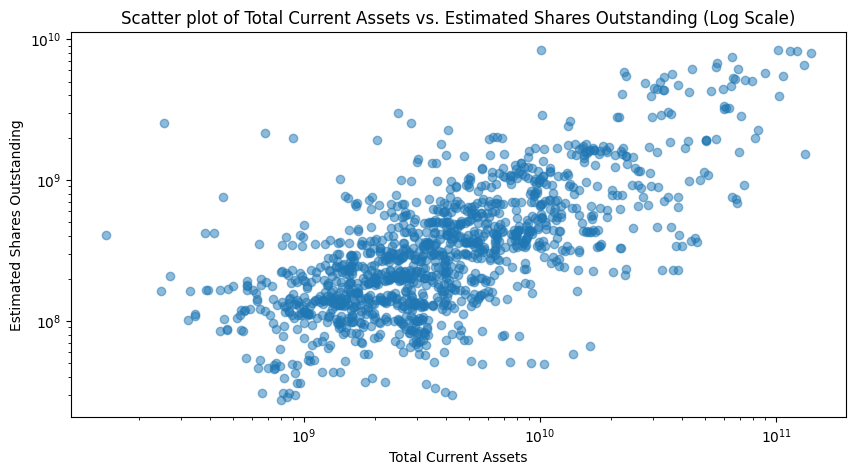

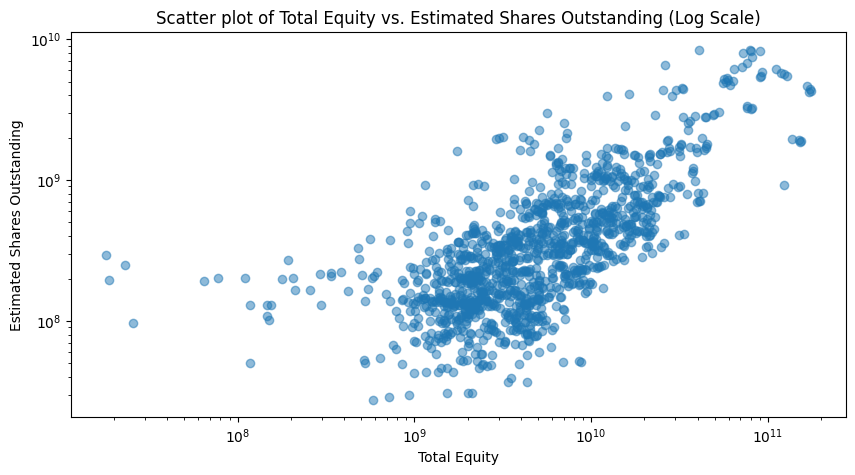

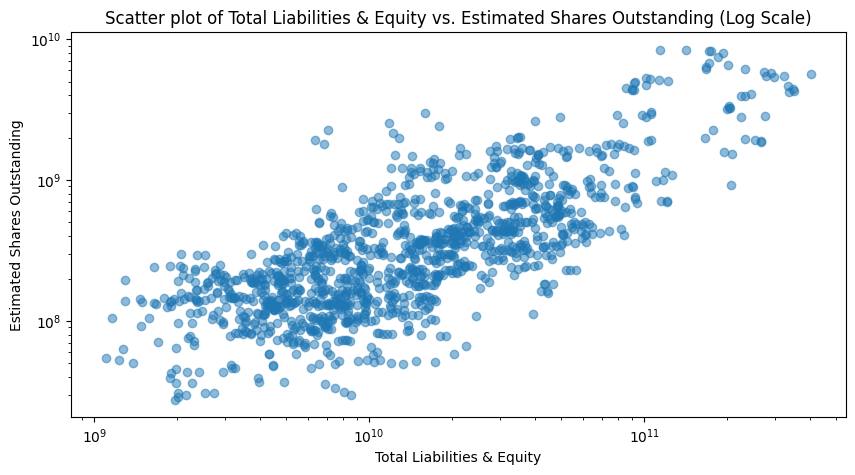

In [9]:
#Creating a scatter plot to see the relationship between these columns and 'Estimated Shares Outstanding'

#Remove the column 'Estimated Shares Outstanding' from var_of_interest
var_of_interest.remove(var)

for col in var_of_interest:
    plt.figure(figsize=(10, 5))
    plt.scatter(data[col], data[var], alpha=0.5)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f"Scatter plot of {col} vs. {var} (Log Scale)")
    plt.xlabel(f"{col}")
    plt.ylabel(f"{var}")
    plt.show()

<Figure size 1000x500 with 0 Axes>

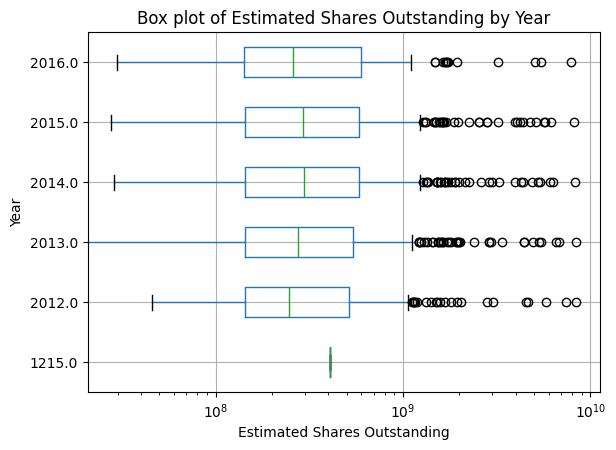

In [10]:
# And since we removed the period ending, we'll check if the 'For Year' column represents the same, and understand their distribution 
#on Outstanding Shares

# Box plot for price based on make
plt.figure(figsize=(10, 5))
data.boxplot(column=var, by='For Year', vert=False)
plt.title(f"Box plot of {var} by Year")
plt.xlabel(f"{var}")
plt.xscale('log')
plt.ylabel("Year")
plt.suptitle('') 
plt.show()

#### Insights from Data Exploration 

- There are null values across more than two columns. All the rows with the NaN values are removed.

- After plotting the correlation heatmap across all columns, we determined that columns:'Net Cash Flow-Operating', 'Total Assets','Total Current Assets','Total Equity','Total Liabilities & Equity' have a correlation of 0.7 or higher w.r.t 'Estimated Shares Outstanding'

- After looking at the histogram of all the above mentioned columns, we can say that they all follow right-skewed distribution

- After looking at the scatter plot, we can see not all the above mentioned columns are in linear relationship with 'Estimated Outstanding Shares'. For instance, 'Total Current Assets', and 'Total Equity' seem to be non-linear with the given data. 

- Since the variance for all the year looks almost similar, we will include them in the model.

## 2. Linear Regression Model Development

In [11]:
X=data.drop(var, axis=1)
y=data[var]
x=sm.add_constant(X)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  23:59:47   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                7.312e+08      1e+09      0.729      0.466   -1.24e+09     2.7e+09
Accounts Payable                                     -183.9454    238.959     -0.770      0.442    -652.760     284.869
Accounts Receivable                                    -0.0722      0.057     -1.274      0.203      -0.183       0.039
Add'l income/expense items                              0.0361      0.057      0.635      0.525      -0.075       0.148
After Tax ROE                                       -6.663e+05      5e+05     -1.332      0.183   -1.65e+06    3.15e+05
Capital Expenditures                                    0.9122      2.396      0.381      0.704      -3.789       5.614
Capital Surplus                                         0.0149      0.009      1.631      0.103      -0.003       0.033
Cash Ratio                                           6.866e+05   3.83e+05      1.793      0.073   -6.45e+04    1.44e+06
Cash and Cash Equivalents                              -1.2388      0.617     -2.008      0.045      -2.449      -0.029
Changes in Inventories                                 -0.0876      0.060     -1.456      0.146      -0.206       0.030
Common Stocks                                          -0.0014      0.010     -0.143      0.886      -0.020       0.018
Cost of Revenue                                       822.2045   1127.552      0.729      0.466   -1389.943    3034.352
Current Ratio                                       -2.044e+05   2.94e+05     -0.695      0.487   -7.82e+05    3.73e+05
Deferred Asset Charges                                 -0.0585      0.989     -0.059      0.953      -1.999       1.882
Deferred Liability Charges                              0.0094      0.099      0.095      0.925      -0.185       0.204
Depreciation                                           -0.0843      0.057     -1.488      0.137      -0.196       0.027
Earnings Before Interest and Tax                       22.5389     39.533      0.570      0.569     -55.022     100.100
Earnings Before Tax                                   -22.8602     39.533     -0.578      0.563    -100.420      54.699
Effect of Exchange Rate                                -0.0233      0.166     -0.141      0.888      -0.348       0.302
Equity Earnings/Loss Unconsolidated Subsidiary          0.1119      0.082      1.371      0.171      -0.048       0.272
Fixed Assets                                           -0.0572      0.989     -0.058      0.954      -1.998       1.883
Goodwill                                               -0.0642      0.989     -0.065      0.9

#### Explanation of the model 

The statistical analysis of our model indicates that most predictors demonstrate significant effects on Estimated Shares Outstanding (p < 0.05), with a high R-squared value of 0.854 suggesting excellent model fit i.e our model with all these metrics extracted from annual SEC 10K fillings is able to explain 85% of the variation in Estimated Shares Outstanding. However, it’s concerning that the high condition number of 1.17e+16 potentially indicates multicollinearity amongst the predictors. And since there are so many variables, further analysis such as FDR will be used to display the individual main effects with highest significance.



## 3. Multicollinearity in Linear Regression

Multicollinearity in linear regression can affect the interpretation of a linear regression model’s coefficients by making it difficult to understand their individual effects on the dependent variable, inflating the standard error, and undermining model reliability for understanding variable impacts. When these variables have collinearity, small changes in the data can result in large variations in the model coefficients and can lead to an under or overestimation of the strength of the relationships between the outcome and the predictor variables. To summarize, although the model may still be useful for predictions or forecasting, the effects of individual variables on the dependent variable may not be confidently studied. 

## 4. P-Value Analysis and Histogram

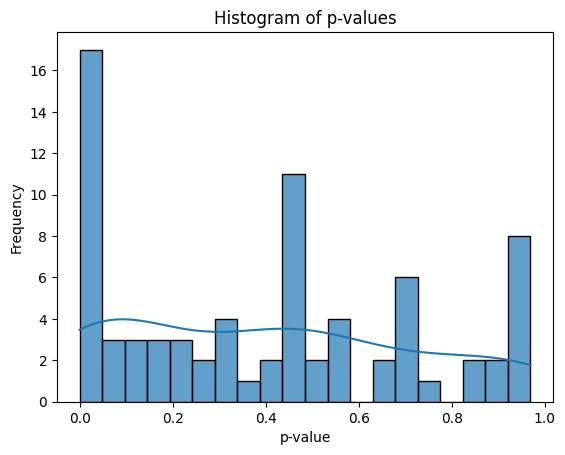

In [12]:
#Storing all the p-values from the model
pvalues=results.pvalues.values

sns.histplot(pvalues, bins=20, edgecolor='black', alpha=0.7,kde=True) # set the histrogram
# set value, x, y labels
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show() # this will print the histrogram

While the histogram of p-values indicates that it follows a multi-modal distribution with the set bucket size, there is no obvious skewedness in either direction. This could mean that not every effect is taken into account for the whole model.  Nonetheless, further analysis is necessary to conclude the validity of our results.

## 5. False Discovery Rate Control with BH Procedure

In [13]:
#Function to determine the modified p* value based on the BH Procedure

def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha, sorted_pvals[np.where(below_threshold)]

Alpha: 0.0016866310081731142


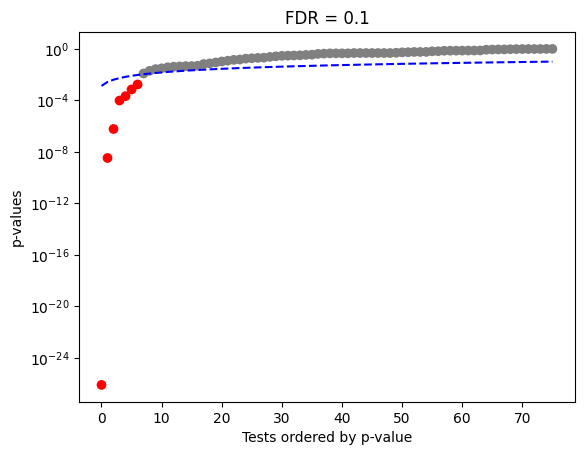

The number of true discoveries are 7.

These are the significant metrics that help us estimate the outstanding shares ['Net Borrowings', 'Operating Income', 'Operating Margin', 'Pre-Tax Margin', 'Research and Development', 'Sale and Purchase of Stock', 'Earnings Per Share'].

The coefficient of these significant metrics that help us estimate the outstanding shares are shown below. 

Net Borrowings                1.033327e-01
Operating Income              1.820131e-01
Operating Margin             -8.032155e+06
Pre-Tax Margin                9.413336e+06
Research and Development      8.255572e-02
Sale and Purchase of Stock    1.253887e-01
Earnings Per Share           -3.087098e+07
dtype: float64.


In [14]:
# False discovery control rate with q=0.1
alpha_threshold, below_threshold = fdr(pvalues, 0.1, plotit=True)

#Finding the significant metrics
significant_cols=results.pvalues[results.pvalues.isin(below_threshold)]

#Finding the coefficients of these significant metrics
significant_cols_coef=results.params[results.params.reset_index()["index"].isin(significant_cols.index.tolist()).tolist()]

print(f"The number of true discoveries are {len(below_threshold)}.\n")
print(f"These are the significant metrics that help us estimate the outstanding shares {significant_cols.index.tolist()}.\n")
print(f"The coefficient of these significant metrics that help us estimate the outstanding shares are shown below. \n\n{significant_cols_coef}.")

## 6. Sensitivity Analysis of FDR Control

Alpha: 0.026230280217806823


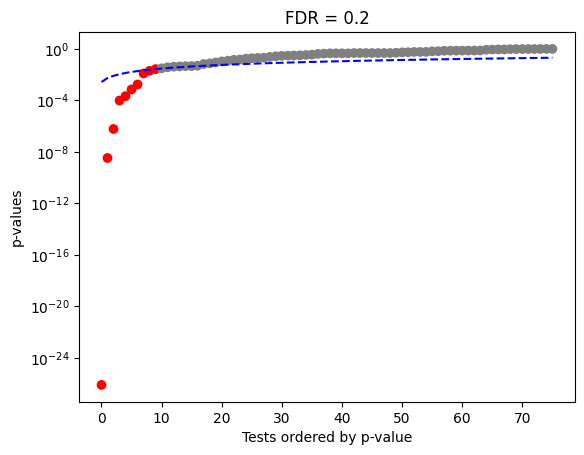

The number of significant discoveries are 10.
`
Alpha: 0.07315082351103051


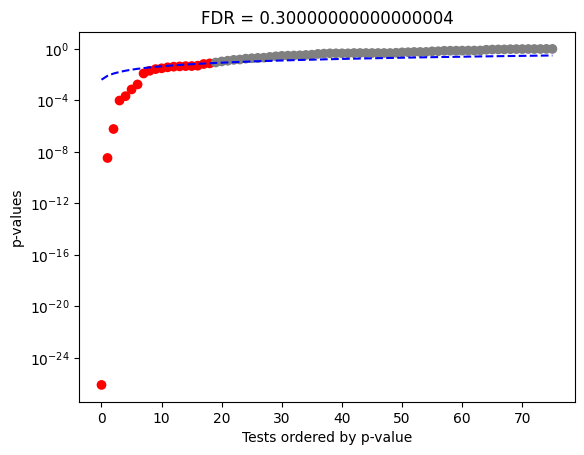

The number of significant discoveries are 19.
`
Alpha: 0.1031931505201318


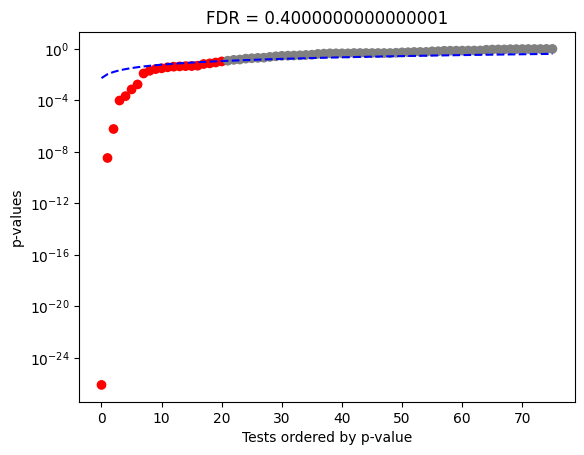

The number of significant discoveries are 21.
`
Alpha: 0.1456384268308343


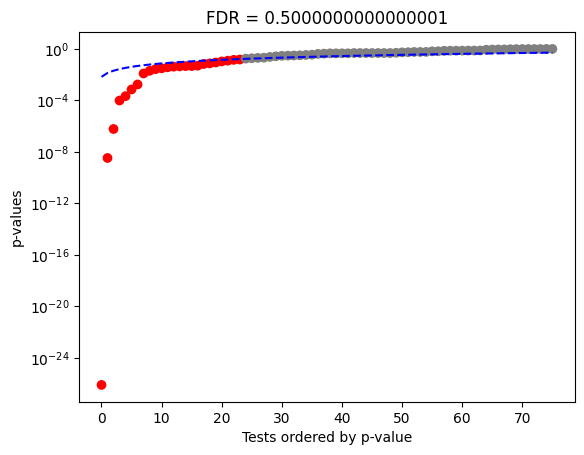

The number of significant discoveries are 24.
`
Alpha: 0.20293656717704095


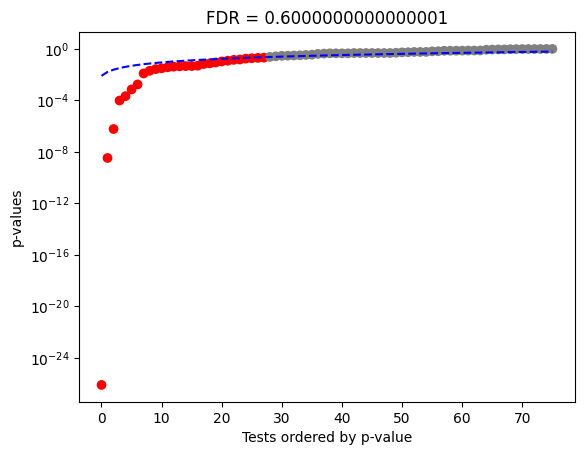

The number of significant discoveries are 28.
`
Alpha: 0.30986779885051746


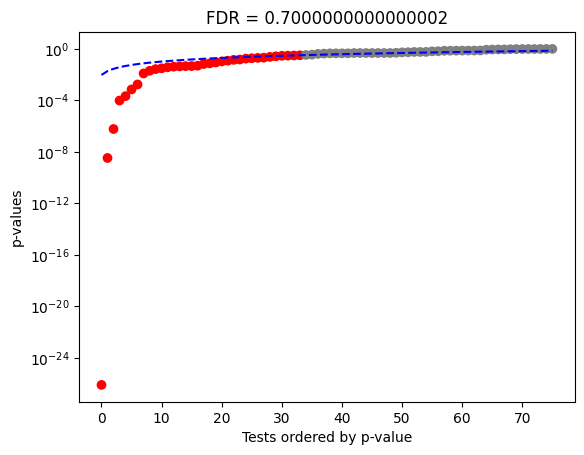

The number of significant discoveries are 34.
`
Alpha: 0.5687004244189178


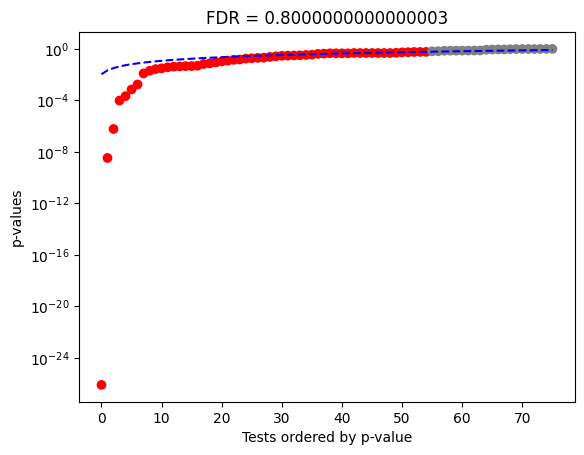

The number of significant discoveries are 47.
`
Alpha: 0.7365703361086239


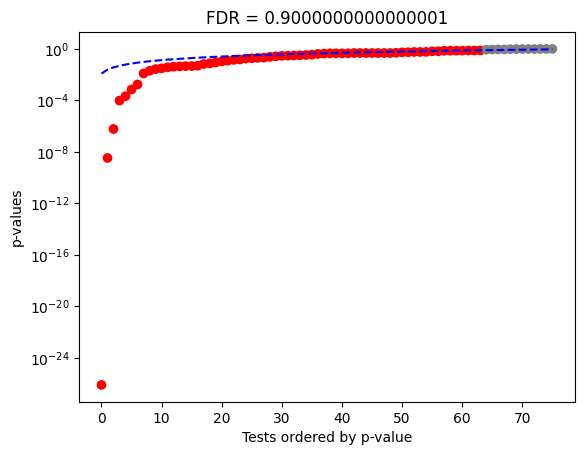

The number of significant discoveries are 62.
`


In [15]:
q_rate=np.arange(0.2,1,0.1)
for q in q_rate:
    alpha_threshold, below_threshold = fdr(pvalues, q, plotit=True)
    print(f"The number of significant discoveries are {len(below_threshold)}.\n`")

With our sensitivity analysis, we can observe that the q-value and the number of significant discoveries are directly proportional. As the q-value progressively increases, the number of significant discoveries gradually increases as well. This tells us that we could control the significant variable's robustness using the q-value, which will reduce the likelihood of false positives. 

## 7. Exploring Interaction Terms

In [16]:
# a).
#To create a model with the interaction, let us take only the first 25 columns from the original data, and consider their interactions.

#Storing the first 25 metrics name in a list 
top_25_names = data.columns[1:25].tolist()
top_25_names = list(map(lambda x: x.replace(' ', '_').replace('/','_').replace('.','_').replace('-','_').replace("'",'_'), top_25_names))

data.columns = data.columns.str.replace(' ', '_');data.columns = data.columns.str.replace('/', '_');
data.columns = data.columns.str.replace('.', '_');data.columns = data.columns.str.replace('-', '_');
data.columns = data.columns.str.replace("'", '_');

#A function that creates a formula between pairs of predictors, and upto a quadratic terms i.e in powers of two.
def create_smf_formula(i, names,formula):
    formula=f"{names[i]} + {formula} + {names[i]} ** 2"
    for j in np.arange(i,len(top_25_names)-1):
        formula=f"{formula} + {names[i]} * {names[j]}"     
    return formula

formula=""

#Create the formula with interaction and quadratic terms with the top 25 metrics with the lowest p-values from the original model
for i in np.arange(len(top_25_names)):
    formula=create_smf_formula(i,top_25_names,formula)


formula = f"Estimated_Shares_Outstanding ~ {formula}"
results_interaction = smf.ols(formula=formula, data=data).fit()
results_interaction.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated_Shares_Outstanding   R-squared:                       0.928
Model:                                      OLS   Adj. R-squared:                  0.910
Method:                           Least Squares   F-statistic:                     53.80
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  23:59:49   Log-Likelihood:                -27051.
No. Observations:                          1299   AIC:                         5.460e+04
Df Residuals:                              1048   BIC:                         5.590e+04
Df Model:                                   250                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                           0.0032      0.001      3.107      0.002       0.001       0.005
Intangible_Assets                                                                  -0.0100      0.009     -1.071      0.284      -0.028       0.008
Income_Tax                                                                          0.5632      0.284      1.984      0.047       0.006       1.120
Gross_Profit                                                                       -0.1457      0.066     -2.197      0.028      -0.276      -0.016
Gross_Margin                                                                        0.0060      0.003      2.026      0.043       0.000       0.012
Goodwill                                                                            0.0118      0.023      0.518      0.605      -0.033       0.056
Fixed_Assets                                                                        0.0533      0.015      3.577      0.000       0.024       0.083
Equity_Earnings_Loss_Unconsolidated_Subsidiary                                      1.0018      0.585      1.713      0.087      -0.146       2.149
Effect_of_Exchange_Rate                                                            -2.0616      1.042     -1.979      0.048      -4.106      -0.017
Earnings_Before_Tax                                                                -0.7503      0.330     -2.276      0.023      -1.397      -0.104
Earnings_Before_Interest_and_Tax                                                    0.7709      0.327      2.356      0.019       0.129       1.413
Depreciation                                                                       -0.1463      0.128     -1.143      0.253      -0.397       0.105
Deferred_Liability_Charges                                                         -0.1767      0.053     -3.316      0.001      -0.281      -0.072
Deferred_Asset_Charges                                                              0.0839      0.112      0.746      0.456      -0.137       0.305
Current_Ratio                                                                      -0.0019      0.001     -2.161      0.031      -0.004      -0.000
Cost_of_Revenue                                                                    -0.0158      0.005     -3.120      0.002      -0.026      -0.006
Common_Stocks                                                                       0.0986      0.044      2.221      0.027       0.012       0.186
Changes_in_In

b) Interaction terms might be important because they can capture the non-linear relationship between major finance metrics and Estimated Shares Outstanding. Also, it shows if 2 different 10K metrics are affecting the outstanding shares only when put together. All of these factors lead to a better model fit, a more confident study of these metrics on Estimated Shares Outstanding, and as well as their predictions &forecasting.

## 8. Model Evaluation with Interaction Terms

c) The original model has a R-squared of 0.854 and an Adjusted R-squared of 0.845. On the other hand, the new model with interaction has higher R-squared and Adjusted R-squared at 0.928 and 0.910, respectively. Both these numbers indicate that the new model has a better fit. Furthermore, the original model has an F-statistic of 98.4 with a p-value of 0, and the new model has it at 53.81 also with a p-value of 0, so we can reject the null hypothesis for both models, suggesting that the interaction model is still significant, and explains the variation of Estimated Outstanding Shares better than the model with only the main effects. 


d) From the R-squared and Adjusted R-squared, we can see the new model has a better fit, which indicates that interaction needs to be considered under this case. However, the AIC and BIC between the two models do not differ much from each other, which indicates that the complexity of the two models is still too high. Also, coefficients for some of the variables change drastically between the two models, which is because interactions are being considered for the new model.

## 9. Model Evaluation with Interaction Terms

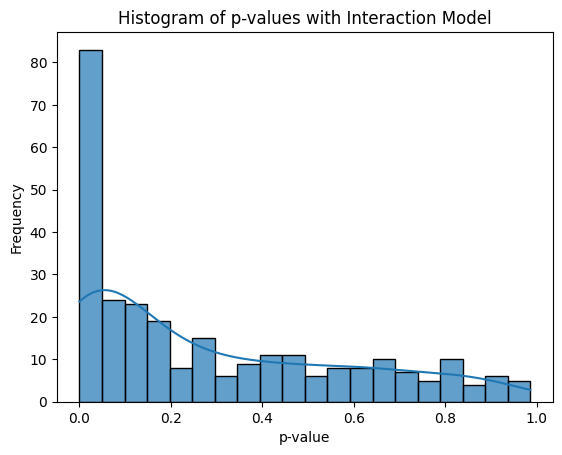

a. There is big spike for the p values that are closer to 0 in this histogram, and the rest of the p values are more uniformly distributed instead of spiking at other values as the original model does. 

This explains that there is some significant scope to study these metrics on Estimated Shares Outstanding with higher confidence.
Alpha: 0.023805670223795327


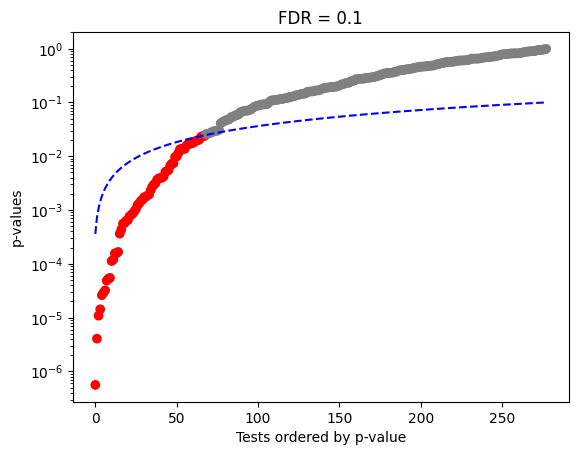

b. The number of significant discoveries with the main effects and interactions are 68.

The coefficient of these significant metrics and the interactions that help us estimate the outstanding shares are shown below. 

 Intercept                                                                          3.212275e-03
Fixed_Assets                                                                       5.332860e-02
Earnings_Before_Tax                                                               -7.502817e-01
Earnings_Before_Interest_and_Tax                                                   7.708670e-01
Deferred_Liability_Charges                                                        -1.767202e-01
Cost_of_Revenue                                                                   -1.575016e-02
Capital_Surplus                                                                    5.405909e-02
After_Tax_ROE                                                                      5.594304e-04
Accounts_Rec

In [18]:
#a)
#Storing all the p-values from the interaction model
pvalues_interaction=results_interaction.pvalues.values

sns.histplot(pvalues_interaction, bins=20, edgecolor='black', alpha=0.7,kde=True) # set the histrogram
# set value, x, y labels
plt.title("Histogram of p-values with Interaction Model")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show() # this will print the histrogram

print("a. There is big spike for the p values that are closer to 0 in this histogram, and the rest of the p values are more uniformly distributed instead of spiking at other values as the original model does. \n")
print("This explains that there is some significant scope to study these metrics on Estimated Shares Outstanding with higher confidence.")


#b)
# False discovery control rate with q=0.1
alpha_threshold_interaction, below_threshold_interaction = fdr(pvalues_interaction, 0.1, plotit=True)

#Finding the significant metrics
significant_cols_interaction=results_interaction.pvalues[results_interaction.pvalues.isin(below_threshold_interaction)]

#Finding the coefficients of these significant metrics
significant_cols_coef_interaction=results_interaction.params[
                    results_interaction.params.reset_index()["index"].isin(significant_cols_interaction.index.tolist()).tolist()]

print(f"b. The number of significant discoveries with the main effects and interactions are {len(below_threshold_interaction)}.\n")
# print(f"These are the significant metrics and the interactions that help us estimate the outstanding shares {significant_cols_interaction.index.tolist()}.\n")
print(f"The coefficient of these significant metrics and the interactions that help us estimate the outstanding shares are shown below. \n\n {significant_cols_coef_interaction.to_string()}.")


c) After integrating interaction terms into our revised model, we observed a substantial climb in significant findings, escalating from 7 to 68. This suggests that the interactions offer insights previously not known when considering the variables by themselves. Given a fixed q value, we can still control the significance of these main and interaction effects, ultimately helping us in the reduction of false positives. 